In [2]:
import pandas as pd
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [3]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13, )

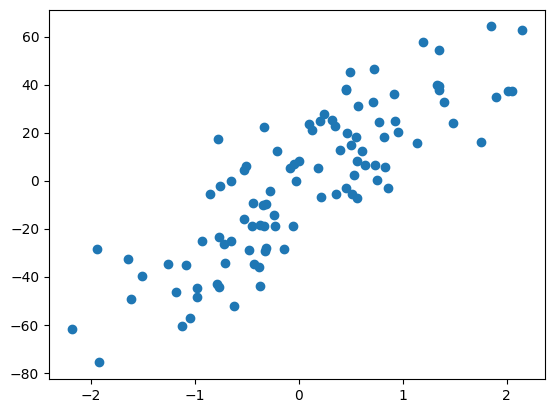

In [4]:
plt.scatter(X,y)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[28.16404017]
-2.7130725669241036


In [31]:
from sklearn.linear_model import Ridge
r = Ridge().fit(X_train,y_train)
print(r.coef_)
print(r.intercept_)

[27.76681655]
-2.703390253029336


In [32]:
r_ten = Ridge(alpha=10).fit(X_train,y_train)
print(r_ten.coef_)
print(r_ten.intercept_)

[24.63922736]
-2.627155359611534


In [33]:
r_hun = Ridge(alpha=100).fit(X_train,y_train)
print(r_hun.coef_)
print(r_hun.intercept_)

[11.58742415]
-2.309018045155845


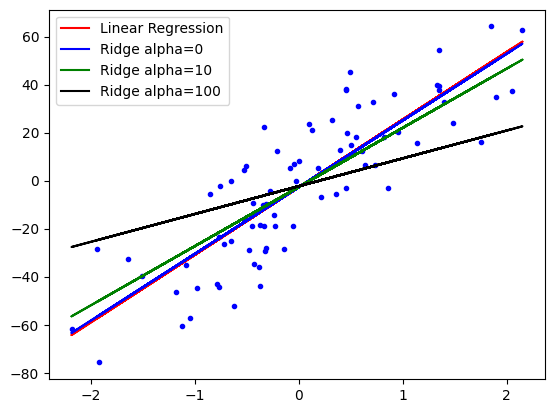

In [36]:
plt.plot(X_train, y_train, "b.")
plt.plot(X_train, lr.predict(X_train), "red", label="Linear Regression")
plt.plot(X_train, r.predict(X_train), "blue", label="Ridge alpha=0")
plt.plot(X_train, r_ten.predict(X_train), "green", label="Ridge alpha=10")
plt.plot(X_train, r_hun.predict(X_train), "black", label="Ridge alpha=100")
plt.legend(loc="upper left")

In [50]:
class MeraRidge:
    def __init__(self, alpha):
        self.alpha = alpha
        self.m = None
        self.b = None
    def fit(self,X_train, y_train):
        num = 0
        den = 0
        for i in range(X_train.shape[0]):
            num = num + (y_train[i] - y_train.mean()) * (X_train[i] - X_train.mean())
            den = den + (X_train[i] - X_train.mean()) * (X_train[i] - X_train.mean())
        self.m = num / (den + self.alpha)
        self.b = y_train.mean() - (self.m * X_train.mean())
        print(self.m, self.b)
    def predict(self, X_test):
        return (self.m * X_test) + self.b

In [51]:
r_r = MeraRidge(alpha=10)
r_r.fit(X_train,y_train)


[24.63922736] [-2.62715536]


In [52]:
r_r.predict(X_test)

array([[ 17.84571806],
       [-21.71418004],
       [ 11.24095455],
       [ 20.09869181],
       [ 26.71090257],
       [ 11.22653865],
       [-25.50061805],
       [ 10.04551024],
       [ 47.02632873],
       [-20.17991085],
       [-42.42216767],
       [ 15.16150583],
       [ 15.94506582],
       [-33.71215108],
       [  5.96578981],
       [  3.233478  ],
       [ 10.4892389 ],
       [-26.87611662],
       [  2.4928774 ],
       [ 16.24430112]])